### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [12]:
# Step 1: Read the CSV file
filename = 'csi_output2.csv'
df = pd.read_csv(filename)
df.head()

,133,CSI,48:4A:E9:20:BE:E0,-91,128,-43,80,13,0,-8,...,-7.6,6.4,-8.6,5.3,-7.7,4.6,-5.5,6.5,-3.5,8.2
0,165,CSI,48:4A:E9:20:EE:80,-73,128,-42,96,13,0,-37,...,10.0,2.0,3.0,2.0,-5.0,1.0,-12.0,0.0,-18.0,-2.0
1,197,CSI,48:4A:E9:20:EE:81,-73,128,-43,80,13,0,-36,...,10.0,6.0,3.0,3.0,-5.0,-1.0,-14.0,-4.0,-19.0,-7.0
2,228,CSI,48:4A:E9:20:EE:82,-73,128,-44,64,13,0,-4,...,4.0,-12.0,2.0,-2.0,-1.0,6.0,-2.0,13.0,-1.0,18.0
3,260,CSI,48:4A:E9:1F:F5:60,-89,128,-43,80,13,0,0,...,-5.0,-7.0,-1.0,-11.0,3.0,-14.0,3.0,-14.0,2.0,-12.0
4,301,CSI,48:4A:E9:20:BE:E0,-89,128,-43,80,13,0,-8,...,-15.0,-9.0,-18.0,-11.0,-21.0,-13.0,-19.0,-12.0,-16.0,-10.0


### Drop the columns that are not needed 

In [13]:
# Drop columns by their index positions (1-based index)
df = df.drop(df.columns[[1, 2, 3, 4]], axis=1)  # index starts from 0
df.head()

,133,-43,80,13,0,-8,1,-8.1,1.1,-6,...,-7.6,6.4,-8.6,5.3,-7.7,4.6,-5.5,6.5,-3.5,8.2
0,165,-42,96,13,0,-37,-6,-37,-6,-37,...,10.0,2.0,3.0,2.0,-5.0,1.0,-12.0,0.0,-18.0,-2.0
1,197,-43,80,13,0,-36,-13,-37,-13,-36,...,10.0,6.0,3.0,3.0,-5.0,-1.0,-14.0,-4.0,-19.0,-7.0
2,228,-44,64,13,0,-4,38,-5,39,-4,...,4.0,-12.0,2.0,-2.0,-1.0,6.0,-2.0,13.0,-1.0,18.0
3,260,-43,80,13,0,0,-17,1,-15,0,...,-5.0,-7.0,-1.0,-11.0,3.0,-14.0,3.0,-14.0,2.0,-12.0
4,301,-43,80,13,0,-8,-3,-7,-1,-6,...,-15.0,-9.0,-18.0,-11.0,-21.0,-13.0,-19.0,-12.0,-16.0,-10.0


### Final Heatmap Plot

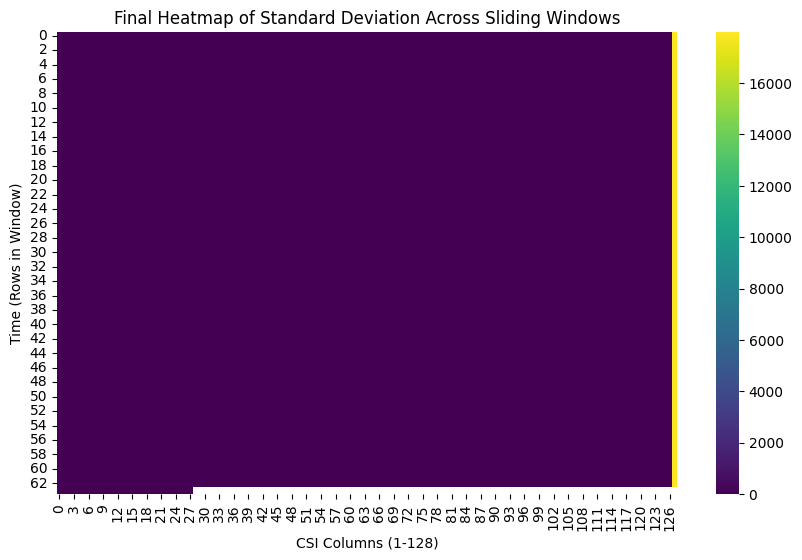

In [14]:
# Step 1: Set parameters for sliding window
window_size = 64
num_rows, num_columns = df.shape

# List to store the CSI matrices (heatmaps)
heatmap_list = []

# Step 2: Create a sliding window loop
for i in range(num_rows - window_size + 1):
    # Extract the current window (i.e., rows i to i + window_size - 1)
    window = df.iloc[i:i + window_size, 1:]  # All columns except the first one (CSI values)
    
    # Convert the DataFrame window to a NumPy array and store it
    heatmap_list.append(window.values)

# Step 3: Stack all the heatmaps into a 3D NumPy array (for easy std calculation)
heatmap_stack = np.stack(heatmap_list)

# Step 4: Compute the standard deviation along the third axis (which is across all windows)
std_heatmap = np.std(heatmap_stack, axis=0)

# Step 5: Plot the final standard deviation heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(std_heatmap, cmap='viridis')

# Set labels and title for the plot
plt.xlabel('CSI Columns (1-128)')
plt.ylabel('Time (Rows in Window)')
plt.title('Final Heatmap of Standard Deviation Across Sliding Windows')

# Create the 'heatmaps_<filename>' directory if it doesn't exist
base_filename = os.path.splitext(os.path.basename(filename))[0]
output_folder = f"heatmaps_{base_filename}"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

file_name = f"final_heatmap.png"
plt.savefig(os.path.join(output_folder, file_name))

# Display the plot
plt.show()


### Individual Heatmap Plots for a window of 64 samples

In [15]:
# Take a smaller sample of 500 rows for analysis
num_rows = 500

# Create a sliding window loop and print/save each heatmap
for i in range(num_rows - window_size + 1):
    # Extract the current window (i.e., rows i to i + window_size - 1)
    window = df.iloc[i:i + window_size, 1:]  # All columns except the first one (CSI values)

    # Convert the DataFrame window to a NumPy array and store it
    csi_values = window.values
    heatmap_list.append(csi_values)  # Store the heatmap for later use
    
    # Plot and display the heatmap for the current window
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_list[i], cmap='viridis', xticklabels=False, yticklabels=False)
    plt.title(f'Heatmap of Sliding Window {i+1} to {i+window_size}')
    
    # Optionally, you can save the heatmap as an image (e.g., PNG)
    file_name = f"heatmap_{i+1}_to_{i+window_size}.png"
    plt.savefig(os.path.join(output_folder, file_name))
    plt.close()
    
    # Display the heatmap
    # plt.show()
